In [16]:
import numerapi
import pandas as pd
import numpy as np

In [17]:
my_models = [f'tutmodel{i}' for i in range(0,34)] + ['tutmodel', 'mrquantsalot']


In [18]:
napi = numerapi.NumerAPI()
dfs = []
for model in my_models:
    data = napi.round_model_performances(model)
    df = pd.DataFrame.from_records(data)
    df = df[df['roundResolved'] & df['corr'].notna()]
    df['model'] = model
    dfs.append(df)






In [19]:
df = pd.concat(dfs).reset_index(drop=True).dropna(how='all', axis=1)
df.drop(inplace=True, columns= ['payout','corrMultiplier','roundOpenTime','roundPayoutFactor','roundResolveTime','roundResolveTime','mmcMultiplier','roundResolved','selectedStakeValue'])
df = df[df['corr'].notna()]
df

,corr,corrPercentile,corrWMetamodel,fnc,fncPercentile,fncV3,fncV3Percentile,mmc,mmcPercentile,roundNumber,tc,tcPercentile,model
0,0.011116,0.463047,0.650755,-0.009814,0.287440,-0.011616,0.225495,0.000738,0.465775,307,-0.009462,0.265180,tutmodel0
1,0.012105,0.193166,0.642992,-0.012749,0.354223,-0.013781,0.269340,-0.016751,0.092456,306,0.041155,0.707446,tutmodel0
2,-0.025747,0.027778,0.615450,-0.036152,0.059302,-0.035329,0.030350,-0.025705,0.015891,305,-0.100321,0.057431,tutmodel0
3,-0.018856,0.064169,0.617217,-0.017781,0.175525,-0.020060,0.116504,-0.016866,0.058335,304,-0.109695,0.057862,tutmodel0
4,-0.017138,0.425800,0.610928,-0.003526,0.422074,-0.004665,0.313582,-0.002590,0.418091,303,-0.111416,0.036326,tutmodel0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.070240,0.746505,0.911931,0.048264,0.762090,NaN,NaN,-0.001076,0.348843,258,0.003158,0.505051,mrquantsalot
892,0.140820,0.791325,0.908817,0.041419,0.721928,NaN,NaN,0.003051,0.449639,257,0.035962,0.788955,mrquantsalot
893,0.071258,0.586350,0.915841,0.023828,0.411890,NaN,NaN,-0.008115,0.152966,256,0.005245,0.548559,mrquantsalot
894,0.097395,0.895136,0.917742,0.044602,0.942486,NaN,NaN,0.004810,0.604092,255,NaN,NaN,mrquantsalot


In [20]:
df['mean_corr'] = df.apply(lambda row: [row['model']], axis=1)

In [21]:
rounds = df['roundNumber'].unique()
scores = []
for _ in range(1000):
    cols_to_keep = np.random.choice(rounds, 10)
    sub_df =df[df['roundNumber'].isin(cols_to_keep)]
    score = df.groupby('model')['tc'].mean()
    scores.append(score)

In [22]:
df.groupby('model')['mmc'].mean().sort_values()

model
tutmodel13     -0.010422
tutmodel14     -0.008453
tutmodel4      -0.008267
tutmodel0      -0.007823
tutmodel1      -0.007537
tutmodel20     -0.006710
tutmodel24     -0.006126
tutmodel       -0.005937
tutmodel21     -0.005617
tutmodel25     -0.005054
tutmodel3      -0.004673
tutmodel30     -0.004607
tutmodel28     -0.003941
tutmodel8      -0.003793
tutmodel32     -0.003452
tutmodel7      -0.002416
tutmodel15     -0.001605
tutmodel10     -0.001518
tutmodel16     -0.001389
tutmodel5      -0.001153
mrquantsalot   -0.000173
tutmodel6      -0.000124
tutmodel22     -0.000102
tutmodel27     -0.000006
tutmodel17      0.000411
tutmodel31      0.000565
tutmodel26      0.000596
tutmodel9       0.000958
tutmodel33      0.002286
tutmodel2       0.003230
tutmodel29      0.003361
tutmodel11      0.004970
tutmodel18      0.005040
tutmodel23      0.005919
tutmodel19      0.006299
tutmodel12      0.008423
Name: mmc, dtype: float64

In [23]:
score_df = pd.concat(scores, axis=1).mean(axis=1).sort_values(ascending=False)
score_df

model
tutmodel19      0.012055
tutmodel33      0.010366
tutmodel22      0.010268
tutmodel21      0.009450
tutmodel8       0.004809
tutmodel20      0.004615
tutmodel27      0.004369
tutmodel9       0.004192
tutmodel7       0.002168
tutmodel5       0.001813
tutmodel31      0.001424
tutmodel2      -0.000372
tutmodel6      -0.001966
mrquantsalot   -0.002252
tutmodel23     -0.003852
tutmodel26     -0.006718
tutmodel0      -0.006784
tutmodel30     -0.008255
tutmodel25     -0.010291
tutmodel3      -0.010292
tutmodel       -0.010742
tutmodel29     -0.011559
tutmodel1      -0.013040
tutmodel28     -0.014464
tutmodel24     -0.016445
tutmodel32     -0.021358
tutmodel11     -0.021922
tutmodel10     -0.022588
tutmodel4      -0.023865
tutmodel12     -0.024093
tutmodel18     -0.029199
tutmodel15     -0.031225
tutmodel17     -0.034536
tutmodel16     -0.039379
tutmodel14     -0.041522
tutmodel13     -0.047581
dtype: float64

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
def p(var):
    col_order = df.groupby('model')[var].mean().sort_values().index
    sns.catplot(
        data=df,
        x='model',
        y=var,
        kind='box',
        order=col_order,
        height=8, 
    )
    plt.rcParams["figure.figsize"] = (8,10)
    plt.xticks(rotation=90)
    plt.title(f'box plot {var}')
    plt.show()

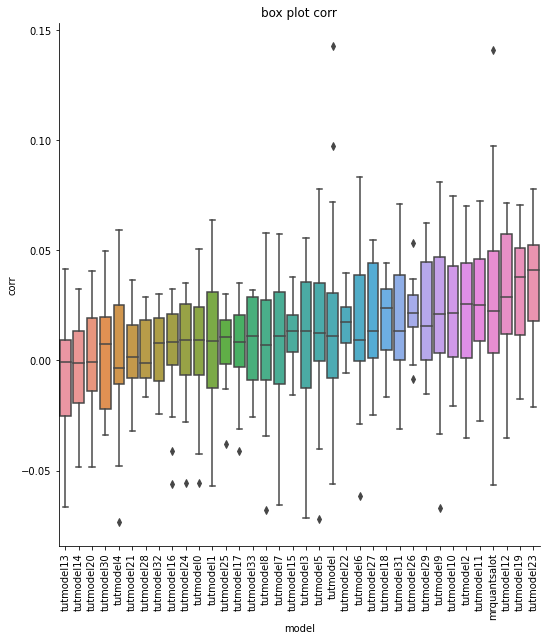

In [33]:
p('corr')

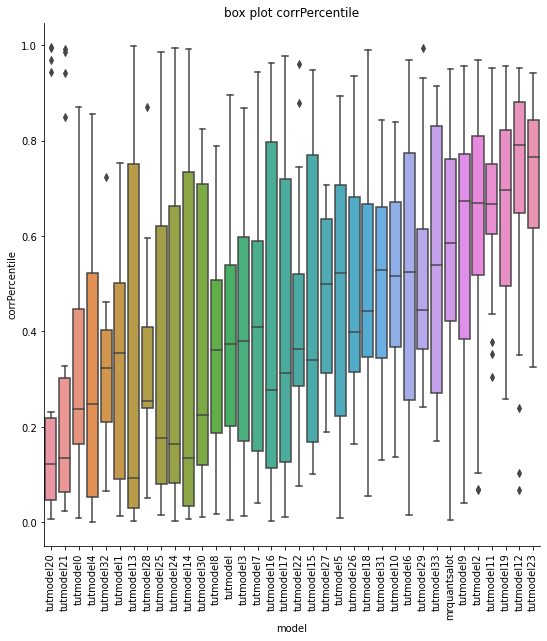

In [34]:
p('corrPercentile')

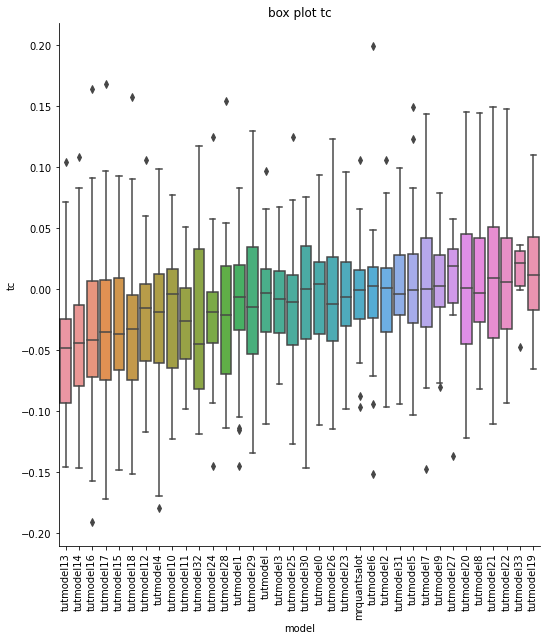

In [35]:
p('tc')

In [36]:
df.columns

Index(['corr', 'corrPercentile', 'corrWMetamodel', 'fnc', 'fncPercentile',
       'fncV3', 'fncV3Percentile', 'mmc', 'mmcPercentile', 'roundNumber', 'tc',
       'tcPercentile', 'model', 'mean_corr'],
      dtype='object')

In [38]:
df[df['model'] == 'tutmodel23'].mean()

/tmp/ipykernel_75783/3623192653.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['model'] == 'tutmodel23'].mean()


corr                 0.034150
corrPercentile       0.702181
corrWMetamodel       0.811896
fnc                  0.014512
fncPercentile        0.664909
fncV3                0.007395
fncV3Percentile      0.545629
mmc                  0.005919
mmcPercentile        0.624843
roundNumber        298.500000
tc                  -0.003852
tcPercentile         0.431371
dtype: float64

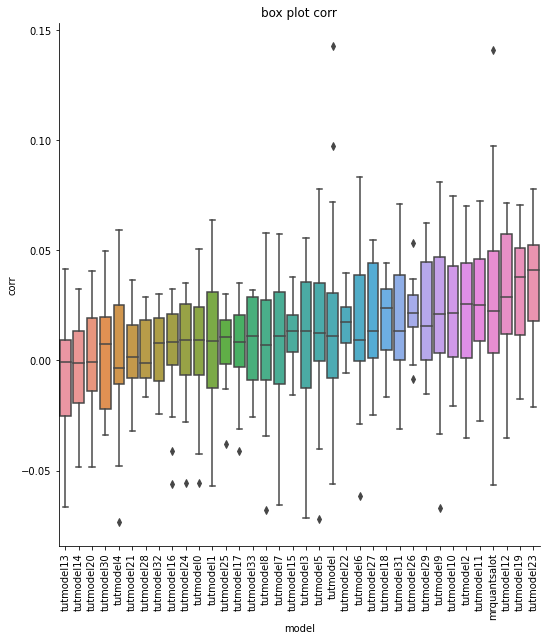

In [30]:
p('corr')

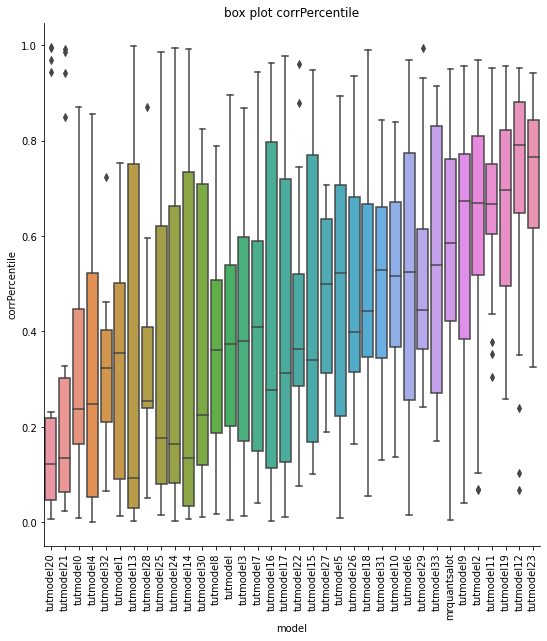

In [39]:
p('corrPercentile')